env: SKG_SUPPRESS=true


/opt/anaconda3/lib/python3.7/site-packages/skgstat/Variogram.py:1668: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


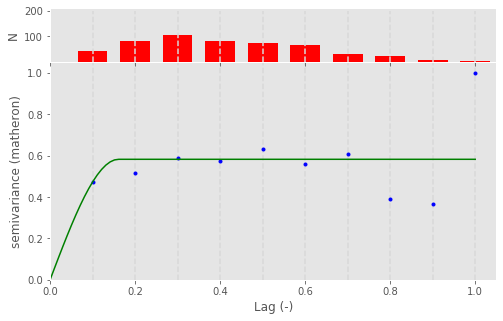

In [79]:
import skgstat as skg
from skgstat import Variogram, OrdinaryKriging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
plt.style.use('ggplot')
%env SKG_SUPPRESS = true
df = pd.read_csv('/Users/peyamowar/26th - 26th.csv')
df1 = df[['deviceid', 'pm25','norm x', 'norm y']]
data1 = df1.values
X1 = data1[:,2:4]
z1 = data1[:,1]
V1 = skg.Variogram(coordinates=X1, values=z1)
#print(V)
V1.plot();



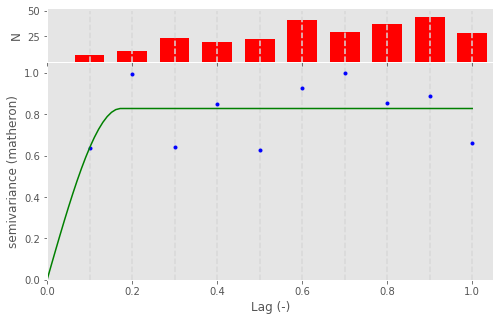

In [80]:
V1.maxlag = 'median'
V1.plot(show=False);

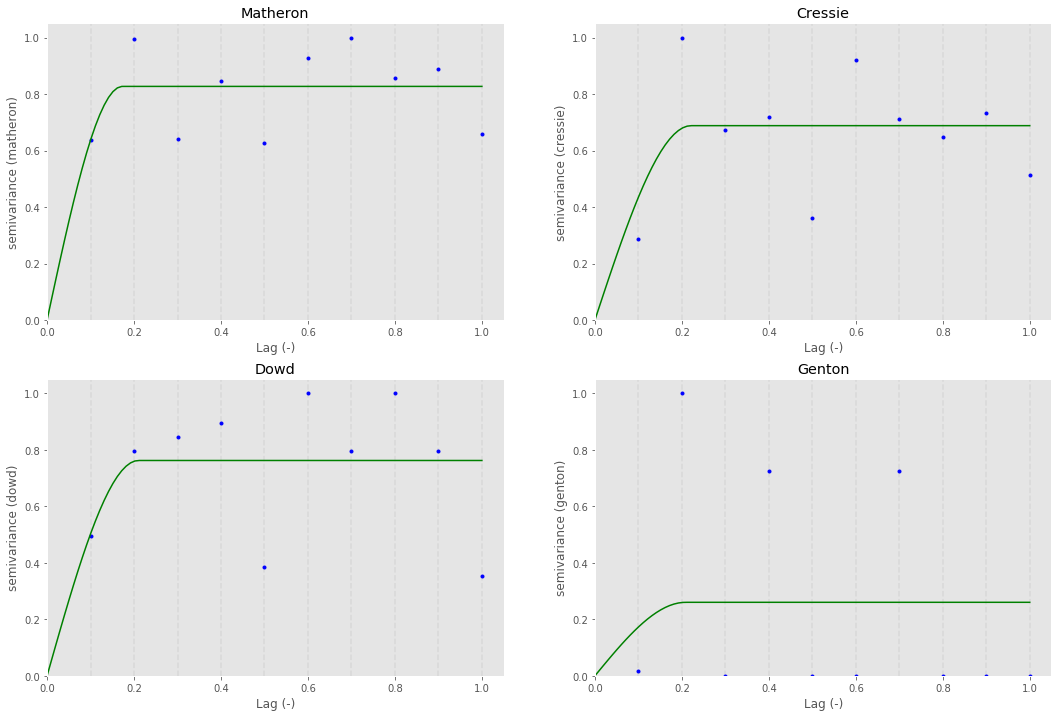

In [81]:
fig, _a = plt.subplots(2, 2, figsize=(18, 12))
axes = _a.flatten()
for ax, est in zip(axes, ('matheron', 'cressie', 'dowd', 'genton')):
    V1.estimator = est
    V1.plot(axes=ax, hist=False, show=False)
    ax.set_title(est.capitalize())

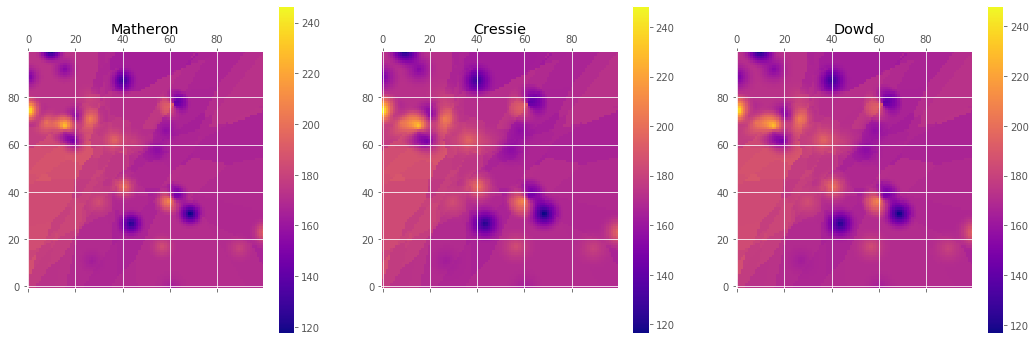

In [82]:
xx, yy = np.mgrid[0:99:100j, 0:99:100j]
fig, _a = plt.subplots(1, 3, figsize=(18, 6))
axes = _a.flatten()

for ax, est in zip(axes, ('matheron', 'cressie', 'dowd')):
    V1.estimator = est
    ok = OrdinaryKriging(V1, min_points=5, max_points=15, mode='exact')
    field = ok.transform(xx.flatten(), yy.flatten()).reshape(xx.shape)
    art = ax.matshow(field, origin='lower', cmap='plasma')
    plt.colorbar(art, ax=ax)
    ax.set_title(est.capitalize())

def spherical(range1, sill, nugget, h):
    if(h<=range1):
        y = nugget + sill*((3*h/(2*range1))-(0.5*(h*h*h/(range1*range1*range1))))
    else:
        y = nugget + sill
    return y

In [83]:
ok._krige([72.15718,4.81593])

(177.00006914530513, 0.006492933305675107)

In [84]:
ok._krige([74.4986,0])

(254.99985939899608, 0.006904305634844707)

In [85]:
ok._krige([67.46953,15.40926])

(233.9998151290265, 0.006847741408800802)

In [86]:
ok._krige([100,9.63187])

(106.0000616580127, 0.00424156320339844)

In [37]:
ok._krige([30.91353,68.37592])

(176.0342583654023, 2242.5497458617056)

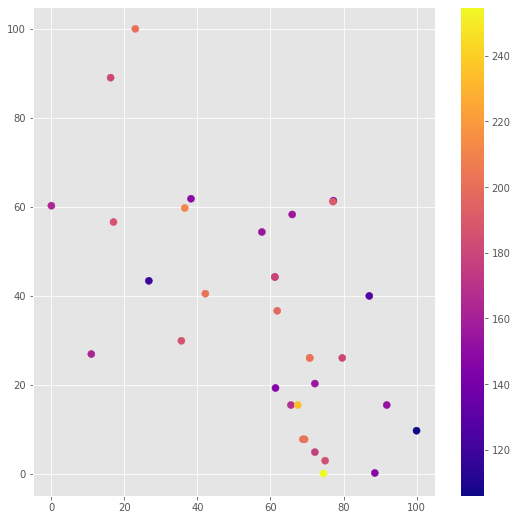

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
art = ax.scatter(X1[:,0],X1[:,1], s=50, c=z1, cmap='plasma')
plt.colorbar(art);

In [78]:
ok._krige([75,2.88436])

(207.0092656332165, 1427.8466869283232)

In [77]:
ok._krige([45,40.44867])

(187.99829514014854, 1711.1789172329673)